## Getting Started

- Download MapPLUTO data from [NYC DCP](https://s-media.nyc.gov/agencies/dcp/assets/files/zip/data-tools/bytes/nyc_mappluto_24v1_1_shp.zip)
- Unzip the file and place contents in the `Data` directory at the root of this repo
- Make sure you have installed all requisite libraries by running `pip install -r requirements.txt` **_with your virtual environment activated_**

## Goals

- Load data from file
- Explore spatial and non-spatial elements of the dataset
- Compare tradeoffs between different methods of loading data
- Demonstrate tradeoffs in different file formats


In [1]:
# the bare minimum
import matplotlib.pyplot as plt
import geopandas as gpd

# more advanced
import pyogrio as ogr
from sklearn.cluster import KMeans
from lonboard import Map, PolygonLayer
from lonboard.colormap import apply_categorical_cmap, apply_continuous_cmap
from palettable.colorbrewer.sequential import PuRd_9
from matplotlib.colors import LogNorm

import pydeck as pdk

# load PLUTO data


In [2]:
# pluto = gpd.read_file("../Data/nyc_mappluto_24v1_1_shp/MapPLUTO.shp")

In [3]:
pluto_ogrio = ogr.read_dataframe("../Data/nyc_mappluto_24v1_1_shp/MapPLUTO.shp")

In [4]:
pluto_ogrio

Borough  Block  Lot   CD  BCT2020    BCTCB2020 CT2010 CB2010  \
0           MN      1   10  101  1000500  10005000003      5   1000   
1           MN     97   33  101  1001501  10015013007  15.01   3014   
2           MN     97   35  101  1001501  10015013007  15.01   3014   
3           MN     97   36  101  1001501  10015013007  15.01   3014   
4           MN     97   43  101  1001501  10015013007  15.01   3014   
...        ...    ...  ...  ...      ...          ...    ...    ...   
856814      SI   8050   76  503  5024800  50248001014    248   1016   
856815      SI   8050   78  503  5024800  50248001014    248   1016   
856816      SI   8050   83  503  5024800  50248001014    248   1016   
856817      SI   8050   86  503  5024800  50248001014    248   1016   
856818      SI   8050   89  503  5024800  50248001014    248   1016   

       SchoolDist  Council  ...  FIRM07_FLA PFIRM15_FL  Version  DCPEdited  \
0              02        1  ...           1          1   24v1.1       None   
1              02        1  ...           1          1   24v1.1          t   
2              02        1  ...           1          1   24v1.1          t   
3              02        1  ...           1          1   24v1.1          t   
4              02        1  ...           1          1   24v1.1          t   
...           ...      ...  ...         ...        ...      ...        ...   
856814         31       51  ...        None       None   24v1.1       None   
856815         31       51  ...        None       None   24v1.1       None   
856816         31       51  ...        None       None   24v1.1       None   
856817         31       51  ...        None       None   24v1.1       None   
856818         31       51  ...        None       None   24v1.1       None   

         Latitude  Longitude Notes Shape_Leng    Shape_Area  \
0       40.688766 -74.018682  None        0.0  7.478663e+06   
1       40.707789 -74.002009  None        0.0  2.839154e+03   
2       40.707728 -74.002117  None        0.0  2.531493e+03   
3       40.707687 -74.002207  None        0.0  1.825158e+03   
4       40.707374 -74.002705  None        0.0  1.057095e+03   
...           ...        ...   ...        ...           ...   
856814  40.509174 -74.250491  None        0.0  3.533919e+03   
856815  40.509303 -74.250326  None        0.0  8.015543e+03   
856816  40.509152 -74.250189  None        0.0  5.078841e+03   
856817  40.508963 -74.250274  None        0.0  1.318642e+04   
856818  40.508834 -74.250187  None        0.0  1.247199e+04   

                                                 geometry  
0       POLYGON ((980898.728 191409.779, 980881.798 19...  
1       POLYGON ((983690.664 197185.709, 983700.362 19...  
2       POLYGON ((983660.178 197162.227, 983697.276 19...  
3       POLYGON ((983608.867 197131.146, 983629.531 19...  
4       POLYGON ((983498.787 196968.26, 983479.066 197...  
...                                                   ...  
856814  POLYGON ((914549.948 124915.949, 914577.436 12...  
856815  POLYGON ((914705.62 124922.971, 914689.091 124...  
856816  POLYGON ((914740.567 124877.857, 914721.621 12...  
856817  POLYGON ((914777.738 124829.873, 914758.578 12...  
856818  POLYGON ((914810.954 124786.995, 914791.371 12...  

[856819 rows x 95 columns]

# basic exploration


In [5]:
pluto_ogrio.dtypes

Borough         object
Block            int64
Lot              int32
CD               int32
BCT2020         object
                ...   
Longitude      float64
Notes           object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
Length: 95, dtype: object

## categorical column


In [6]:
pluto_ogrio.LandUse.value_counts()

LandUse
01    565933
02    131623
04     55966
11     24904
05     21260
03     12916
08     12052
06      9431
10      9344
07      6033
09      4708
Name: count, dtype: int64

🧐 What do those numbers mean? Let's look at the [data dictionary](https://s-media.nyc.gov/agencies/dcp/assets/files/pdf/data-tools/bytes/meta_mappluto.pdf)


In [7]:
# now we can remap the numbers into something more meaningful

land_use_codes = {
    "01": "One & Two Family Buildings",
    "02": "Multi-Family Walk-Up Buildings",
    "03": "Multi-Family Elevator Buildings",
    "04": "Mixed Residential & Commercial Buildings",
    "05": "Commercial & Office Buildings",
    "06": "Industrial & Manufacturing",
    "07": "Transportation & Utility",
    "08": "Public Facilities & Institutions",
    "09": "Open Space & Outdoor Recreation",
    "10": "Parking Facilities",
    "11": "Vacant Land",
}

In [8]:
pluto_ogrio["LandUse"] = pluto_ogrio.LandUse.map(land_use_codes)

## Your turn:

- How many lots of each land use type are there?
  - Use `groupby` to determine the number of lots of each land use type
- What is the lot area of each land use type?
  - Use `groupby` to make a bar chart that shows the average lot area of each land use type
- Can you find the total number of lots that contain `Commercial & Office Buildings` in the Bronx?
  - use groupby on multiple columns to achieve this
- Can you find the share of each land use type in each borough?


In [9]:
# Group by 'LandUse' and count non-null entries for each column
pluto_ogrio.groupby("LandUse").count()#.LotArea.sum()

Borough   Block     Lot      CD  \
LandUse                                                                     
Commercial & Office Buildings               21260   21260   21260   21260   
Industrial & Manufacturing                   9431    9431    9431    9431   
Mixed Residential & Commercial Buildings    55966   55966   55966   55966   
Multi-Family Elevator Buildings             12916   12916   12916   12916   
Multi-Family Walk-Up Buildings             131623  131623  131623  131623   
One & Two Family Buildings                 565933  565933  565933  565933   
Open Space & Outdoor Recreation              4708    4708    4708    4708   
Parking Facilities                           9344    9344    9344    9344   
Public Facilities & Institutions            12052   12052   12052   12052   
Transportation & Utility                     6033    6033    6033    6033   
Vacant Land                                 24904   24904   24904   24904   

                                          BCT2020  BCTCB2020  CT2010  CB2010  \
LandUse                                                                        
Commercial & Office Buildings               21260      21260   21260   21260   
Industrial & Manufacturing                   9431       9431    9431    9431   
Mixed Residential & Commercial Buildings    55966      55966   55966   55966   
Multi-Family Elevator Buildings             12916      12916   12916   12916   
Multi-Family Walk-Up Buildings             131623     131623  131623  131623   
One & Two Family Buildings                 565933     565933  565933  565933   
Open Space & Outdoor Recreation              4707       4707    4707    4707   
Parking Facilities                           9339       9339    9339    9339   
Public Facilities & Institutions            12052      12052   12052   12052   
Transportation & Utility                     6032       6032    6032    6032   
Vacant Land                                 24888      24888   24888   24888   

                                          SchoolDist  Council  ...  \
LandUse                                                        ...   
Commercial & Office Buildings                  21260    21260  ...   
Industrial & Manufacturing                      9426     9431  ...   
Mixed Residential & Commercial Buildings       55966    55966  ...   
Multi-Family Elevator Buildings                12916    12916  ...   
Multi-Family Walk-Up Buildings                131623   131623  ...   
One & Two Family Buildings                    565929   565933  ...   
Open Space & Outdoor Recreation                 4624     4708  ...   
Parking Facilities                              9335     9344  ...   
Public Facilities & Institutions               12051    12052  ...   
Transportation & Utility                        5941     6033  ...   
Vacant Land                                    24531    24904  ...   

                                          FIRM07_FLA  PFIRM15_FL  Version  \
LandUse                                                                     
Commercial & Office Buildings                   1011        1628    21260   
Industrial & Manufacturing                      1030        1327     9431   
Mixed Residential & Commercial Buildings        1345        2266    55966   
Multi-Family Elevator Buildings                  469         754    12916   
Multi-Family Walk-Up Buildings                  2129        5403   131623   
One & Two Family Buildings                     19284       42932   565933   
Open Space & Outdoor Recreation                  954        1089     4708   
Parking Facilities                               742        1050     9344   
Public Facilities & Institutions                 482         753    12052   
Transportation & Utility                         845        1136     6033   
Vacant Land                                     5738        6623    24904   

                                          DCPEdited  Latitude  Longitude  \
LandUse   

In [10]:
# Calculate the total lot area for each land use type
pluto_ogrio.groupby("LandUse").LotArea.sum()

LandUse
Commercial & Office Buildings                274905042
Industrial & Manufacturing                   222481816
Mixed Residential & Commercial Buildings     265149020
Multi-Family Elevator Buildings              353406241
Multi-Family Walk-Up Buildings               482673749
One & Two Family Buildings                  1827228783
Open Space & Outdoor Recreation             1628442460
Parking Facilities                            83803716
Public Facilities & Institutions             521971866
Transportation & Utility                     642314001
Vacant Land                                  553561312
Name: LotArea, dtype: int64

In [11]:
# Calculate the average lot area for each land use type
pluto_ogrio.groupby("LandUse").LotArea.mean()

LandUse
Commercial & Office Buildings                12930.622860
Industrial & Manufacturing                   23590.479907
Mixed Residential & Commercial Buildings      4737.680377
Multi-Family Elevator Buildings              27361.895401
Multi-Family Walk-Up Buildings                3667.092750
One & Two Family Buildings                    3228.701601
Open Space & Outdoor Recreation             345888.372982
Parking Facilities                            8968.719606
Public Facilities & Institutions             43309.978925
Transportation & Utility                    106466.766285
Vacant Land                                  22227.807260
Name: LotArea, dtype: float64

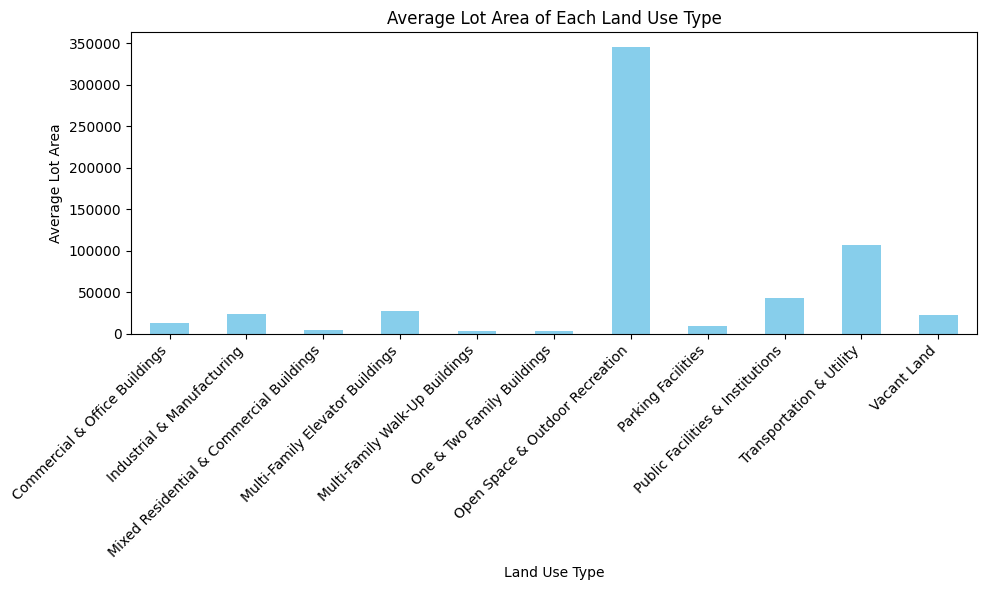

In [12]:
# Plotting the average lot area
pluto_ogrio.groupby("LandUse").LotArea.mean().plot.bar(color='skyblue', figsize=(10, 6))
plt.title('Average Lot Area of Each Land Use Type')
plt.xlabel('Land Use Type')
plt.ylabel('Average Lot Area')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [13]:
pluto_ogrio.groupby(["LandUse","Borough"]).LotArea.sum()

LandUse                                   Borough
Commercial & Office Buildings             BK          56752586
                                          BX          38109407
                                          MN          50379532
                                          QN          75538799
                                          SI          54124718
Industrial & Manufacturing                BK          66216230
                                          BX          40243340
                                          MN           2454173
                                          QN          75625974
                                          SI          37942099
Mixed Residential & Commercial Buildings  BK          86088320
                                          BX          40770014
                                          MN          74910538
                                          QN          53966680
                                          SI           9413468
Multi

In [14]:
# Count the number of lots of each land use type
land_use_counts = pluto_ogrio.groupby('LandUse').size().reset_index(name='NumberOfLots')
print(land_use_counts)

                                     LandUse  NumberOfLots
0              Commercial & Office Buildings         21260
1                 Industrial & Manufacturing          9431
2   Mixed Residential & Commercial Buildings         55966
3            Multi-Family Elevator Buildings         12916
4             Multi-Family Walk-Up Buildings        131623
5                 One & Two Family Buildings        565933
6            Open Space & Outdoor Recreation          4708
7                         Parking Facilities          9344
8           Public Facilities & Institutions         12052
9                   Transportation & Utility          6033
10                               Vacant Land         24904


In [15]:
# Count the number of lots in bronx
pluto_ogrio[(pluto_ogrio['LandUse'] == 'Commercial & Office Buildings') & (pluto_ogrio['Borough'] == 'BX')].shape[0]

2886

In [16]:
pluto_ogrio.groupby(['Borough', 'LandUse']).size().reset_index(name='Count')

Borough                                   LandUse   Count
0       BK             Commercial & Office Buildings    5594
1       BK                Industrial & Manufacturing    4009
2       BK  Mixed Residential & Commercial Buildings   24671
3       BK           Multi-Family Elevator Buildings    3635
4       BK            Multi-Family Walk-Up Buildings   65209
5       BK                One & Two Family Buildings  155870
6       BK           Open Space & Outdoor Recreation    1225
7       BK                        Parking Facilities    3002
8       BK          Public Facilities & Institutions    4223
9       BK                  Transportation & Utility    1788
10      BK                               Vacant Land    5454
11      BX             Commercial & Office Buildings    2886
12      BX                Industrial & Manufacturing    1233
13      BX  Mixed Residential & Commercial Buildings    4353
14      BX           Multi-Family Elevator Buildings    2366
15      BX            Multi-Family Walk-Up Buildings   17876
16      BX                One & Two Family Buildings   51141
17      BX           Open Space & Outdoor Recreation     697
18      BX                        Parking Facilities    1839
19      BX          Public Facilities & Institutions    1926
20      BX                  Transportation & Utility     953
21      BX                               Vacant Land    3705
22      MN             Commercial & Office Buildings    4575
23      MN                Industrial & Manufacturing     205
24      MN  Mixed Residential & Commercial Buildings   12067
25      MN           Multi-Family Elevator Buildings    4853
26      MN            Multi-Family Walk-Up Buildings   11395
27      MN                One & Two Family Buildings    4155
28      MN           Open Space & Outdoor Recreation     582
29      MN                        Parking Facilities     548
30      MN          Public Facilities & Institutions    2379
31      MN                  Transportation & Utility     419
32      MN                               Vacant Land     836
33      QN             Commercial & Office Buildings    6213
34      QN                Industrial & Manufacturing    3451
35      QN  Mixed Residential & Commercial Buildings   13151
36      QN           Multi-Family Elevator Buildings    1972
37      QN            Multi-Family Walk-Up Buildings   35292
38      QN                One & Two Family Buildings  246766
39      QN           Open Space & Outdoor Recreation     976
40      QN                        Parking Facilities    3293
41      QN          Public Facilities & Institutions    2783
42      QN                  Transportation & Utility    2087
43      QN                               Vacant Land    7606
44      SI             Commercial & Office Buildings    1992
45      SI                Industrial & Manufacturing     533
46      SI  Mixed Residential & Commercial Buildings    1724
47      SI           Multi-Family Elevator Buildings      90
48      SI            Multi-Family Walk-Up Buildings    1851
49      SI                One & Two Family Buildings  108001
50      SI           Open Space & Outdoor Recreation    1228
51      SI                        Parking Facilities     662
52      SI          Public Facilities & Institutions     741
53      SI                  Transportation & Utility     786
54      SI                               Vacant Land    7303

In [17]:
pluto_ogrio.groupby('Borough').size().reset_index(name='Total')

Borough   Total
0      BK  275915
1      BX   89353
2      MN   42134
3      QN  324222
4      SI  125195

In [18]:
#Group by 'Borough' and 'LandUse' to get the count of each land use type within each borough
land_use_counts = pluto_ogrio.groupby(['Borough', 'LandUse']).size().reset_index(name='Count') #land_use_counts = data frame

In [19]:
#Group by 'Borough' to get the total count of all land uses within each borough
total_counts = pluto_ogrio.groupby('Borough').size().reset_index(name='Total')#total_counts = data frame

In [20]:
# Merge the two DataFrames on 'Borough'
import pandas as pd

merged_df = pd.merge(land_use_counts, total_counts, on='Borough')#merged_df = data frame which combines bith dataframe together


In [21]:
#Calculate the share by dividing the count of each land use type by the total count of all land uses in the corresponding borough
merged_df['Share'] = merged_df['Count'] / merged_df['Total']
print(merged_df)


   Borough                                   LandUse   Count   Total     Share
0       BK             Commercial & Office Buildings    5594  275915  0.020274
1       BK                Industrial & Manufacturing    4009  275915  0.014530
2       BK  Mixed Residential & Commercial Buildings   24671  275915  0.089415
3       BK           Multi-Family Elevator Buildings    3635  275915  0.013174
4       BK            Multi-Family Walk-Up Buildings   65209  275915  0.236337
5       BK                One & Two Family Buildings  155870  275915  0.564920
6       BK           Open Space & Outdoor Recreation    1225  275915  0.004440
7       BK                        Parking Facilities    3002  275915  0.010880
8       BK          Public Facilities & Institutions    4223  275915  0.015305
9       BK                  Transportation & Utility    1788  275915  0.006480
10      BK                               Vacant Land    5454  275915  0.019767
11      BX             Commercial & Office Buildings

## Okay, now let's look at lot and building area


Text(0.5, 1.0, 'Total lot area by land use type')

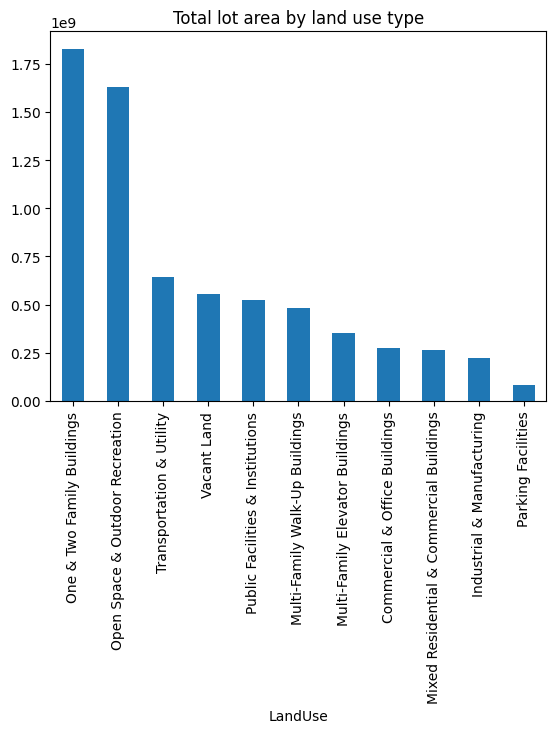

In [22]:
pluto_ogrio.groupby("LandUse").LotArea.sum().sort_values(ascending=False).plot.bar()
plt.title("Total lot area by land use type")

Text(0.5, 1.0, 'Total building area by land use type')

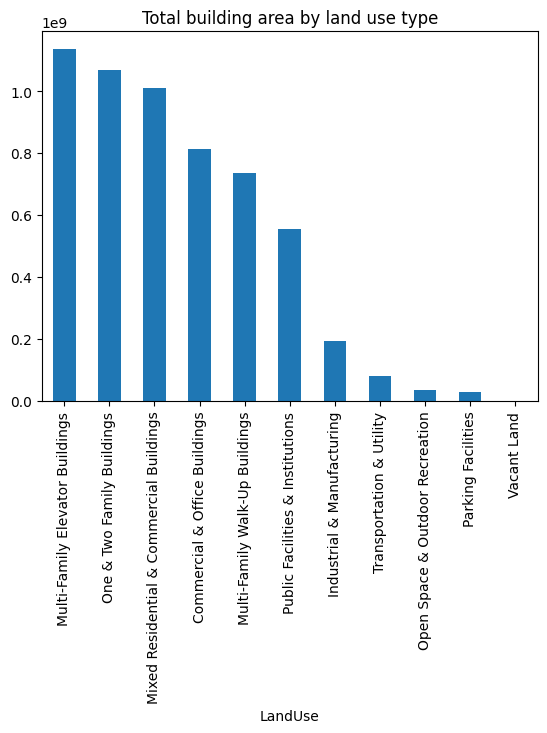

In [23]:
# now the same but for building area
pluto_ogrio.groupby("LandUse").BldgArea.sum().sort_values(ascending=False).plot.bar()
plt.title("Total building area by land use type")

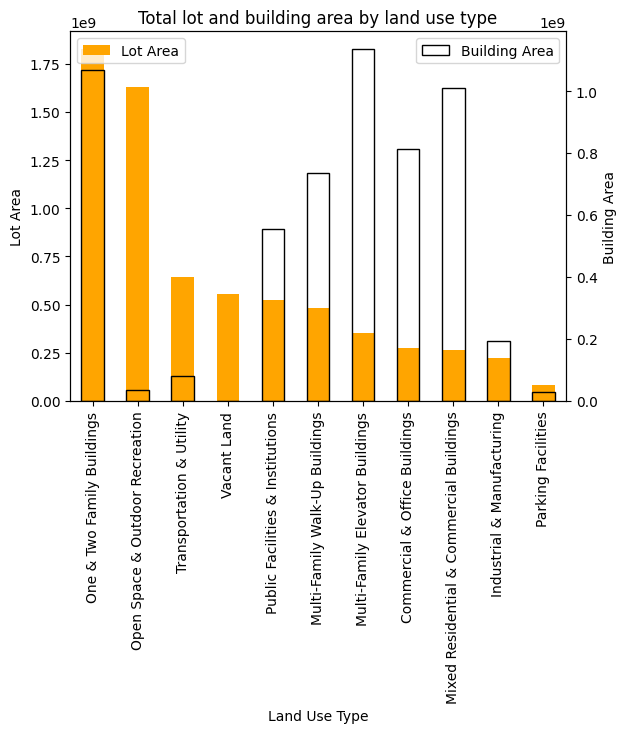

In [24]:
# plot both lot and building area on the same plot with a secondary y-axis
fig, ax = plt.subplots()
by_lot_area = pluto_ogrio.groupby("LandUse").LotArea.sum().sort_values(ascending=False)

by_lot_area.plot.bar(ax=ax, color="orange")

# get order to apply below
order = {v: i for i, v in enumerate(by_lot_area.index)}

ax.set_ylabel("Lot Area")
ax.set_xlabel("Land Use Type")

ax2 = ax.twinx()
pluto_ogrio.groupby("LandUse").BldgArea.sum().reindex(by_lot_area.index).plot.bar(
    ax=ax2, edgecolor="black", color="none"
)
ax2.set_ylabel("Building Area")

plt.title("Total lot and building area by land use type")

# add legends
ax.legend(["Lot Area"], loc="upper left")
ax2.legend(["Building Area"], loc="upper right")

## numeric column


In [25]:
pluto_ogrio.NumFloors.unique()

array([  3.5 ,   4.  ,   5.  ,   2.  ,   6.  ,   0.  ,   8.  ,  14.  ,
        23.  ,  76.  ,  11.  ,  16.  ,  18.  ,   3.  ,   7.  ,   9.  ,
         1.  ,  17.  ,  21.  ,  39.  ,  60.5 ,  70.  ,  30.  ,  22.  ,
        43.  ,  12.  ,  15.  ,  13.  ,  26.  ,  10.  ,   3.25,   5.5 ,
        28.  ,  50.  ,  40.  ,   4.5 ,   7.5 ,  29.  ,  19.  ,  34.  ,
        42.  ,  35.  ,  24.  ,  32.  ,  37.  ,  27.  ,  31.  ,  45.  ,
         2.75,   2.5 ,  63.  ,  44.  ,  54.  ,  25.  ,  38.  ,  33.  ,
        20.  ,  53.  ,   8.5 ,  41.  ,  52.  ,  48.  ,  57.  ,  36.  ,
        47.  ,  66.  ,  60.  ,  71.  ,  56.  , 104.  ,   6.5 ,  51.  ,
        61.  ,  49.  ,  12.5 ,  58.  ,  46.  ,   1.5 ,   1.75,   3.75,
        11.5 ,   5.75,  72.  ,   2.25,   2.67,   1.15,  68.  ,   3.67,
         4.75,   1.25,  64.  ,  69.  ,   4.33,  59.  ,   4.25,  13.5 ,
       102.  ,   1.67,   9.5 ,  65.  ,  20.5 ,  55.  ,  78.  ,  77.  ,
        82.  ,  62.  ,  67.  ,  98.  ,  15.5 ,  16.5 ,  14.5 ,  10.5 ,
      

In [26]:
pluto_ogrio["NumFloors"].describe()

count    856819.000000
mean          2.357554
std           2.012707
min           0.000000
25%           2.000000
50%           2.000000
75%           2.500000
max         104.000000
Name: NumFloors, dtype: float64

<Axes: ylabel='Frequency'>

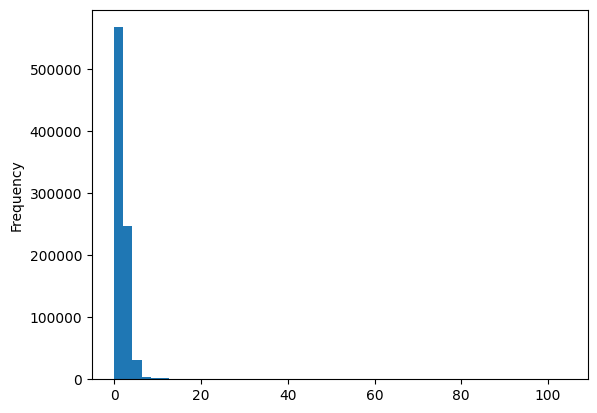

In [27]:
pluto_ogrio["NumFloors"].plot.hist(bins=50)

## Your turn:

- make a histogram for each borough like above
- then, choose another chart type to visualize the distribution of lot area for each borough. See [here](https://matplotlib.org/stable/plot_types/index.html) for some built in options in matplotlib, or here for [seaborn](https://seaborn.pydata.org/tutorial/distributions.html)


In [28]:
pluto_ogrio.Borough.unique()

array(['MN', 'BX', 'BK', 'QN', 'SI'], dtype=object)

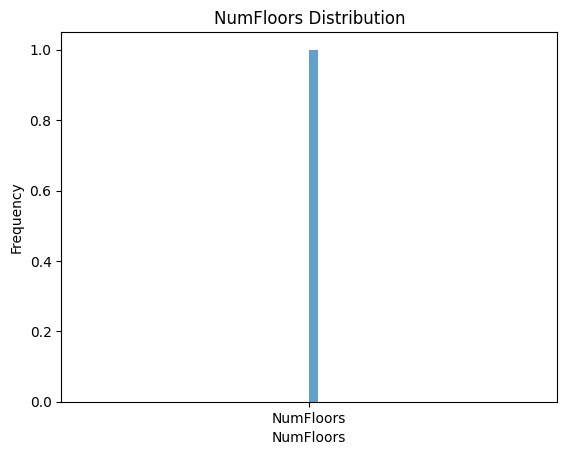

In [29]:
plt.hist(['NumFloors'], bins=50, alpha=0.7)
plt.title(f'NumFloors Distribution')
plt.xlabel('NumFloors')
plt.ylabel('Frequency')
plt.show()

In [30]:
pluto_ogrio["Borough"].describe()

count     856819
unique         5
top           QN
freq      324222
Name: Borough, dtype: object

In [31]:
pluto_ogrio["Borough"]

0         MN
1         MN
2         MN
3         MN
4         MN
          ..
856814    SI
856815    SI
856816    SI
856817    SI
856818    SI
Name: Borough, Length: 856819, dtype: object

In [32]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


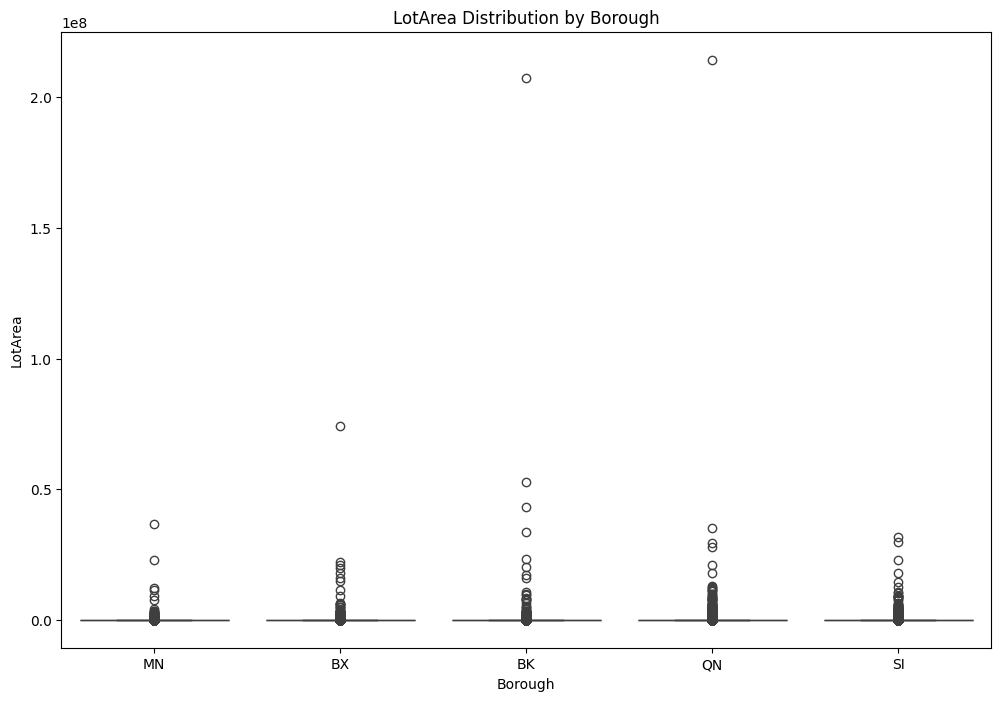

In [33]:
import seaborn as sns

# Creating box plots for "LotArea" for each borough
plt.figure(figsize=(12, 8))
sns.boxplot(x='Borough', y='LotArea', data=pluto_ogrio)
plt.title('LotArea Distribution by Borough')
plt.xlabel('Borough')
plt.ylabel('LotArea')
plt.show()

## Ok, now let's make a boxplot to see how wide the range is within each boro's data


<Axes: title={'center': 'NumFloors'}, xlabel='Borough'>

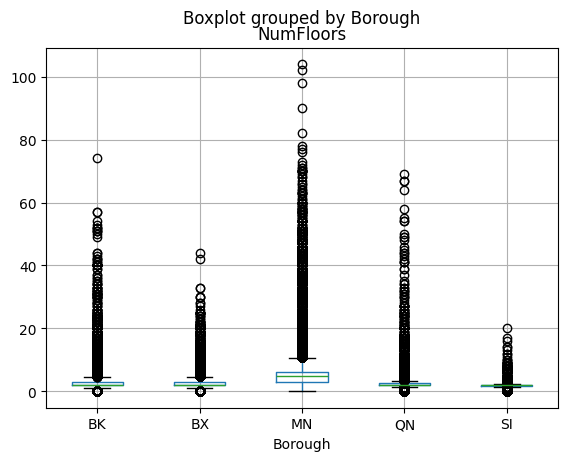

In [34]:
pluto_ogrio.boxplot(column="NumFloors", by="Borough")

What does this distribution tell us about the number of floors in each borough?


This distribution highlights the architectural and zoning differences across the boroughs, with Manhattan being more vertical and urbanized compared to the other boroughs. 

Manhattan: Has a higher number of floors on average, with significant variability and many high-rise buildings. While Brooklyn, Bronx, Queens, Staten Island: Generally have buildings with fewer floors, with occasional outliers.

# cluster by number of floors


In [35]:
# get clusters using kmeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(pluto_ogrio[["NumFloors", "ResArea"]])

pluto_ogrio["NumFloorsCluster"] = kmeans.predict(pluto_ogrio[["NumFloors", "ResArea"]])

In [36]:
pluto_ogrio.groupby("NumFloorsCluster").NumFloors.describe().sort_values("max")

count       mean        std   min    25%   50%   75%  \
NumFloorsCluster                                                            
2                      4.0  23.250000  11.265730  13.0  13.75  23.5  33.0   
4                     47.0  18.585106  11.575048   0.0  12.75  18.0  22.5   
3                   8895.0   9.656296   6.945868   0.0   6.00   6.0  12.0   
1                    924.0  23.519481  15.735151   0.0  12.00  20.0  33.0   
0                 846949.0   2.256813   1.496375   0.0   2.00   2.0   2.5   

                    max  
NumFloorsCluster         
2                  33.0  
4                  46.0  
3                  82.0  
1                  98.0  
0                 104.0

<Axes: xlabel='NumFloors', ylabel='ResArea'>

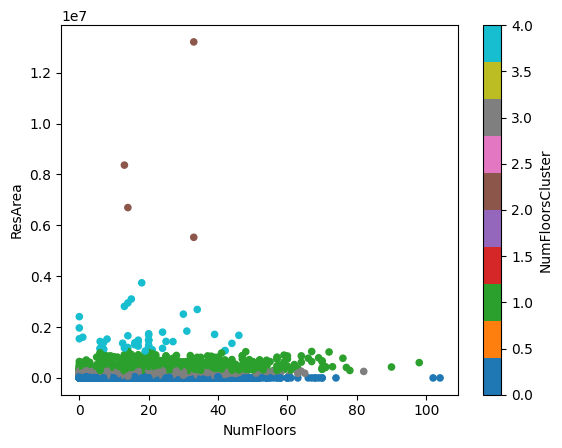

In [37]:
pluto_ogrio.plot.scatter(x="NumFloors", y="ResArea", c="NumFloorsCluster", cmap="tab10")

<Axes: xlabel='NumFloors', ylabel='ResArea'>

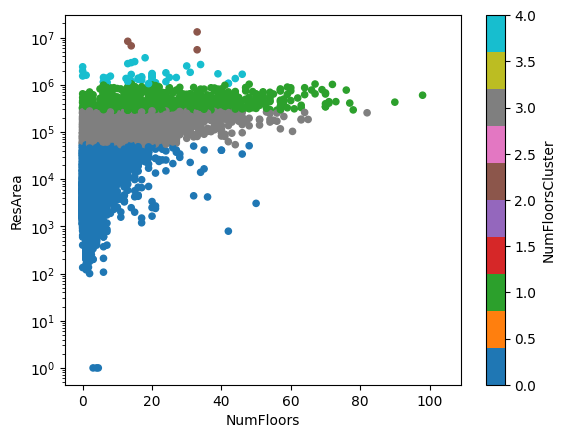

In [38]:
# same as above but with log y axis
pluto_ogrio.plot.scatter(
    x="NumFloors", y="ResArea", c="NumFloorsCluster", cmap="tab10", logy=True
)

<Axes: ylabel='Frequency'>

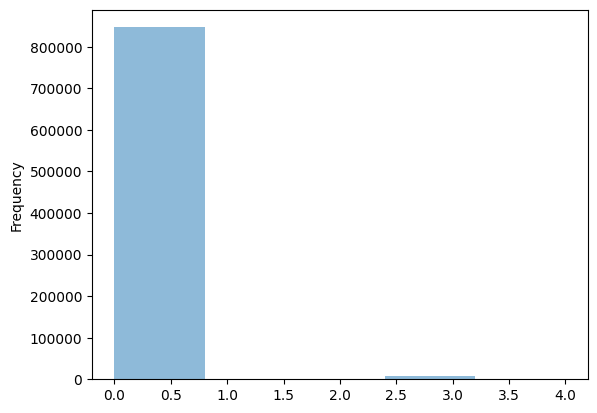

In [39]:
pluto_ogrio["NumFloorsCluster"].plot.hist(bins=5, alpha=0.5)

# and now, mapping


## static map


Text(0.5, 1.0, 'NYC MapPLUTO')

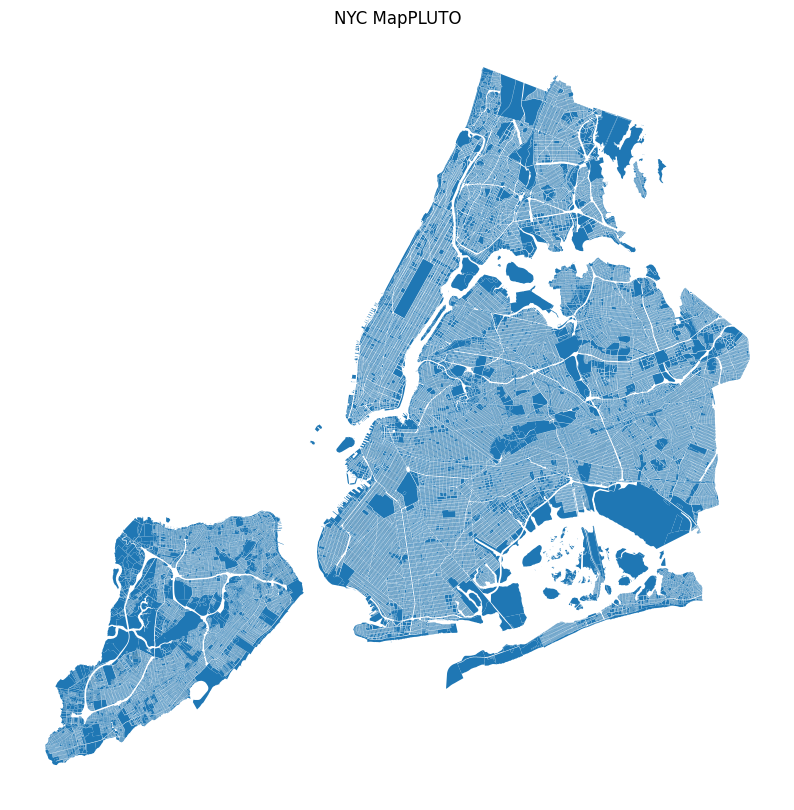

In [40]:
pluto_ogrio.plot(figsize=(10, 10)).set_axis_off()
plt.title("NYC MapPLUTO")

In [41]:
cmap = {
    "One & Two Family Buildings": "#ff0000",
    "Multi-Family Walk-Up Buildings": "#00ff00",
    "Multi-Family Elevator Buildings": "#0000ff",
    "Mixed Residential & Commercial Buildings": "#ff00ff",
    "Commercial & Office Buildings": "#00ffff",
    "Industrial & Manufacturing": "#ffff00",
    "Transportation & Utility": "#808080",
    "Public Facilities & Institutions": "#800000",
    "Open Space & Outdoor Recreation": "#008000",
    "Parking Facilities": "#000080",
    "Vacant Land": "#800080",
    "Unknown": "#000000",
}

In [42]:
pluto_ogrio.fillna({"LandUse": "Unknown"}, inplace=True)

In [43]:
pluto_ogrio["color"] = pluto_ogrio["LandUse"].map(cmap)

In [44]:
ax = pluto_ogrio.plot(
    color=pluto_ogrio["color"],
    figsize=(10, 10),
    legend=True,
).set_axis_off()
plt.title("NYC MapPLUTO")


# populate legend items based on dict from above
legend_colors = [
    plt.Line2D([0], [0], marker="o", color="w", markerfacecolor=c, markersize=10)
    for c in cmap.values()
]
labels = cmap.keys()
plt.legend(legend_colors, labels, loc="upper left")

Text(0.5, 1.0, 'NYC MapPLUTO')

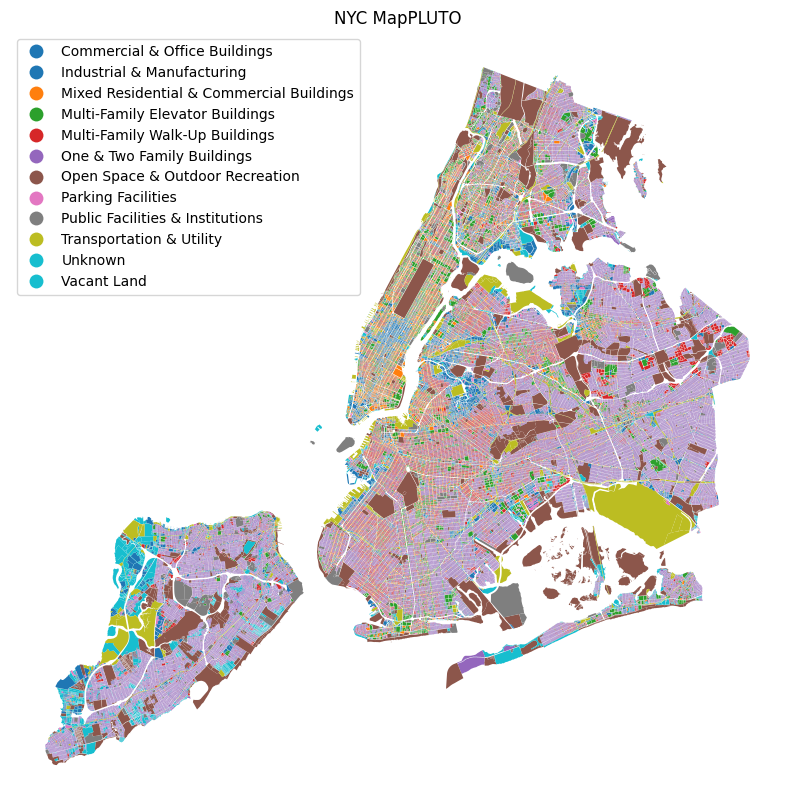

In [ ]:
pluto_ogrio.plot(
    column="LandUse", figsize=(10, 10), legend=True, legend_kwds={"loc": "upper left"}
).set_axis_off()
plt.title("NYC MapPLUTO")

## Your turn:

- map a numeric column using a continuous colormap for Queens. See here for a list and discussion of colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html
- What patterns emerge?


In [ ]:
pluto_ogrio.Borough

0         MN
1         MN
2         MN
3         MN
4         MN
          ..
856814    SI
856815    SI
856816    SI
856817    SI
856818    SI
Name: Borough, Length: 856819, dtype: object

In [ ]:
pluto_ogrio[pluto_ogrio.Borough.eq("MN")]

Borough  Block   Lot   CD  BCT2020    BCTCB2020 CT2010 CB2010  \
0           MN      1    10  101  1000500  10005000003      5   1000   
1           MN     97    33  101  1001501  10015013007  15.01   3014   
2           MN     97    35  101  1001501  10015013007  15.01   3014   
3           MN     97    36  101  1001501  10015013007  15.01   3014   
4           MN     97    43  101  1001501  10015013007  15.01   3014   
...        ...    ...   ...  ...      ...          ...    ...    ...   
140520      MN   2250    86  112  1030700  10307003001    307   3001   
140521      MN   2250   158  112  1030700  10307003001    307   3001   
140522      MN   2255     1  112  1029700  10297001003    297   1000   
140523      MN   2255  1031  112  1029700  10297001005    297   1002   
140524      MN   2255  2000  112  1029700  10297001003    297   1000   

       SchoolDist  Council  ...  Version DCPEdited   Latitude  Longitude  \
0              02        1  ...   24v1.1      None  40.688766 -74.018682   
1              02        1  ...   24v1.1         t  40.707789 -74.002009   
2              02        1  ...   24v1.1         t  40.707728 -74.002117   
3              02        1  ...   24v1.1         t  40.707687 -74.002207   
4              02        1  ...   24v1.1         t  40.707374 -74.002705   
...           ...      ...  ...      ...       ...        ...        ...   
140520         06       10  ...   24v1.1      None  40.871766 -73.918642   
140521         06       10  ...   24v1.1      None  40.872348 -73.918388   
140522         06       10  ...   24v1.1         t  40.871649 -73.920334   
140523         06       10  ...   24v1.1      None  40.870050 -73.930919   
140524         06       10  ...   24v1.1      None  40.873486 -73.925694   

        Notes Shape_Leng    Shape_Area  \
0        None        0.0  7.478663e+06   
1        None        0.0  2.839154e+03   
2        None        0.0  2.531493e+03   
3        None        0.0  1.825158e+03   
4        None        0.0  1.057095e+03   
...       ...        ...           ...   
140520   None        0.0  5.371688e+03   
140521   None        0.0  6.809618e+03   
140522   None        0.0  4.482530e+05   
140523   None        0.0  3.506142e+04   
140524   None        0.0  7.989918e+06   

                                                 geometry NumFloorsCluster  \
0       POLYGON ((980898.728 191409.779, 980881.798 19...                0   
1       POLYGON ((983690.664 197185.709, 983700.362 19...                0   
2       POLYGON ((983660.178 197162.227, 983697.276 19...                0   
3       POLYGON ((983608.867 197131.146, 983629.531 19...                0   
4       POLYGON ((983498.787 196968.26, 983479.066 197...                0   
...                                                   ...              ...   
140520  POLYGON ((1006804.425 256876.882, 1006766.541 ...                0   
140521  POLYGON ((1006954.862 257230.489, 1006880.192 ...                0   
140522  POLYGON ((1006117.341 256247.347, 1005974.528 ...                0   
140523  POLYGON ((1003411.827 256344.601, 1003261.893 ...                0   
140524  MULTIPOLYGON (((1006649.506 258448.393, 100663...                0   

          color  
0       #800000  
1       #00ff00  
2       #ff00ff  
3       #ff00ff  
4       #ff00ff  
...         ...  
140520  #00ff00  
140521  #000080  
140522  #008000  
140523  #808080  
140524  #008000  

[42134 rows x 97 columns]

<function matplotlib.pyplot.savefig(*args, **kwargs) -> 'None'>

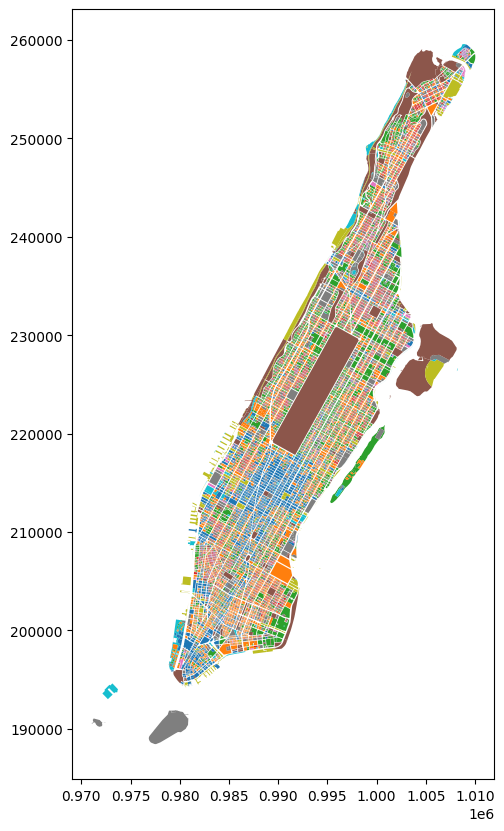

In [ ]:
pluto_ogrio[pluto_ogrio.Borough.eq("MN")].plot(column="LandUse",figsize=(10,10))

plt.savefig

In [ ]:
pluto_ogrio[pluto_ogrio.Borough.eq("QN")]

Borough  Block  Lot   CD  BCT2020    BCTCB2020 CT2010 CB2010  \
269445      QN      6    1  402  4000101  40001011005      1   1015   
269446      QN      6    3  402  4000101  40001011014      1   1015   
269447      QN      6    8  402  4000101  40001011007      1   1011   
269448      QN      6   38  402  4000101  40001011004      1   1016   
269449      QN      6   40  402  4000101  40001011005      1   1015   
...        ...    ...  ...  ...      ...          ...    ...    ...   
828433      QN  16304   32  414  4092200  40922002011    922   2011   
828434      QN  16304   35  414  4092200  40922002011    922   2011   
828435      QN  16304   38  414  4092200  40922002011    922   2011   
828436      QN  16304   45  414  4092200  40922002011    922   2011   
828437      QN  16304   47  414  4092200  40922002011    922   2011   

       SchoolDist  Council  ...  Version DCPEdited   Latitude  Longitude  \
269445         30       26  ...   24v1.1         t  40.740733 -73.961644   
269446         30       26  ...   24v1.1      None  40.741482 -73.959355   
269447         30       26  ...   24v1.1         t  40.742711 -73.959326   
269448       None       26  ...   24v1.1         t  40.741573 -73.961495   
269449         30       26  ...   24v1.1         t  40.739668 -73.960363   
...           ...      ...  ...      ...       ...        ...        ...   
828433         27       32  ...   24v1.1      None  40.571561 -73.863704   
828434         27       32  ...   24v1.1      None  40.571448 -73.863640   
828435         27       32  ...   24v1.1      None  40.571273 -73.863539   
828436         27       32  ...   24v1.1      None  40.571097 -73.863831   
828437         27       32  ...   24v1.1      None  40.571221 -73.863903   

        Notes Shape_Leng     Shape_Area  \
269445   None        0.0  472593.785567   
269446   None        0.0   19173.641718   
269447   None        0.0   30223.288409   
269448   None        0.0    3434.727711   
269449   None        0.0   72572.874601   
...       ...        ...            ...   
828433   None        0.0    4919.084096   
828434   None        0.0    4118.646438   
828435   None        0.0    9987.168048   
828436   None        0.0    4953.599074   
828437   None        0.0    4868.987175   

                                                 geometry NumFloorsCluster  \
269445  MULTIPOLYGON (((995251.969 209549.004, 995235....                0   
269446  POLYGON ((995538.256 209316.719, 995538.241 20...                0   
269447  POLYGON ((995683.078 209903.111, 995666.216 20...                0   
269448  MULTIPOLYGON (((995043.174 209292.068, 995016....                0   
269449  POLYGON ((995403.533 208838.012, 995336.509 20...                0   
...                                                   ...              ...   
828433  POLYGON ((1022171.107 147539.449, 1022079.218 ...                0   
828434  POLYGON ((1022187.603 147501.964, 1022095.803 ...                0   
828435  POLYGON ((1022136.088 147370.066, 1022116.046 ...                0   
828436  POLYGON ((1022136.088 147370.066, 1022044.674 ...                0   
828437  POLYGON ((1022096.347 147459.791, 1022116.046 ...                0   

          color  
269445  #008000  
269446  #808080  
269447  #800000  
269448  #808080  
269449  #800080  
...         ...  
828433  #ff0000  
828434  #ff0000  
828435  #ff0000  
828436  #ff0000  
828437  #ff0000  

[324222 rows x 97 columns]

<Axes: >

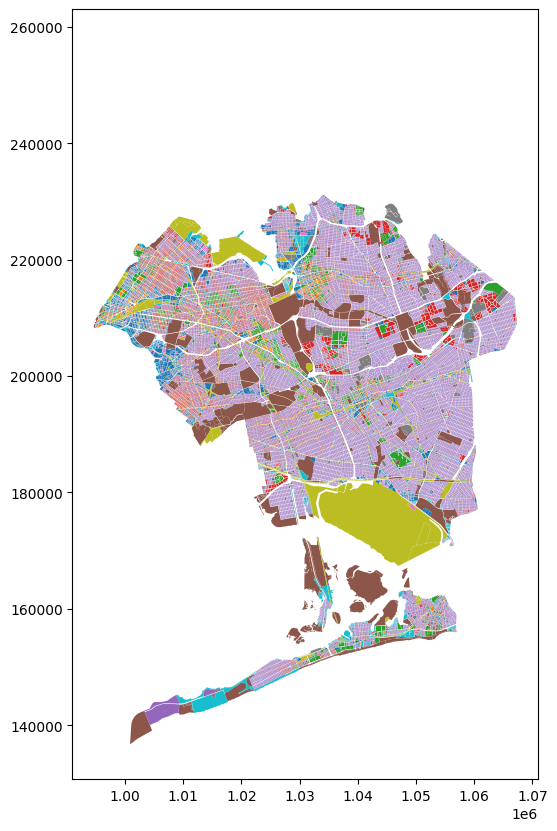

In [ ]:
pluto_ogrio[pluto_ogrio.Borough.eq("QN")].plot(column="LandUse",figsize=(10,10))

The map visualization with a continuous colormap for "NumFloors" in Queens highlights the following:
- - High-rise concentration in specific urban centers.
- Residential neighborhoods with predominantly low-rise buildings.
- Mixed-use areas with varied building heights.
- Industrial zones with distinct structural characteristics.

These patterns are essential for urban planning, real estate development, and understanding the urban fabric of Queens.

# prep for interactive mapping


In [ ]:
pluto_ogrio.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
pluto_ogrio_wgs = pluto_ogrio.to_crs("epsg:4326")

In [ ]:
pluto_ogrio_wgs

Borough  Block  Lot   CD  BCT2020    BCTCB2020 CT2010 CB2010  \
0           MN      1   10  101  1000500  10005000003      5   1000   
1           MN     97   33  101  1001501  10015013007  15.01   3014   
2           MN     97   35  101  1001501  10015013007  15.01   3014   
3           MN     97   36  101  1001501  10015013007  15.01   3014   
4           MN     97   43  101  1001501  10015013007  15.01   3014   
...        ...    ...  ...  ...      ...          ...    ...    ...   
856814      SI   8050   76  503  5024800  50248001014    248   1016   
856815      SI   8050   78  503  5024800  50248001014    248   1016   
856816      SI   8050   83  503  5024800  50248001014    248   1016   
856817      SI   8050   86  503  5024800  50248001014    248   1016   
856818      SI   8050   89  503  5024800  50248001014    248   1016   

       SchoolDist  Council  ...  Version DCPEdited   Latitude  Longitude  \
0              02        1  ...   24v1.1      None  40.688766 -74.018682   
1              02        1  ...   24v1.1         t  40.707789 -74.002009   
2              02        1  ...   24v1.1         t  40.707728 -74.002117   
3              02        1  ...   24v1.1         t  40.707687 -74.002207   
4              02        1  ...   24v1.1         t  40.707374 -74.002705   
...           ...      ...  ...      ...       ...        ...        ...   
856814         31       51  ...   24v1.1      None  40.509174 -74.250491   
856815         31       51  ...   24v1.1      None  40.509303 -74.250326   
856816         31       51  ...   24v1.1      None  40.509152 -74.250189   
856817         31       51  ...   24v1.1      None  40.508963 -74.250274   
856818         31       51  ...   24v1.1      None  40.508834 -74.250187   

        Notes Shape_Leng    Shape_Area  \
0        None        0.0  7.478663e+06   
1        None        0.0  2.839154e+03   
2        None        0.0  2.531493e+03   
3        None        0.0  1.825158e+03   
4        None        0.0  1.057095e+03   
...       ...        ...           ...   
856814   None        0.0  3.533919e+03   
856815   None        0.0  8.015543e+03   
856816   None        0.0  5.078841e+03   
856817   None        0.0  1.318642e+04   
856818   None        0.0  1.247199e+04   

                                                 geometry NumFloorsCluster  \
0       POLYGON ((-74.01208 40.69205, -74.01215 40.692...                0   
1       POLYGON ((-74.00202 40.70791, -74.00198 40.707...                0   
2       POLYGON ((-74.00213 40.70784, -74.00199 40.707...                0   
3       POLYGON ((-74.00231 40.70776, -74.00224 40.707...                0   
4       POLYGON ((-74.00271 40.70731, -74.00278 40.707...                0   
...                                                   ...              ...   
856814  POLYGON ((-74.25065 40.50927, -74.25055 40.509...                0   
856815  POLYGON ((-74.25009 40.50929, -74.25015 40.509...                0   
856816  POLYGON ((-74.24997 40.50916, -74.25004 40.509...                0   
856817  POLYGON ((-74.24983 40.50903, -74.2499 40.5090...                0   
856818  POLYGON ((-74.24971 40.50891, -74.24978 40.508...                0   

          color  
0       #800000  
1       #00ff00  
2       #ff00ff  
3       #ff00ff  
4       #ff00ff  
...         ...  
856814  #ff0000  
856815  #ff0000  
856816  #ff0000  
856817  #ff0000  
856818  #ff0000  

[856819 rows x 97 columns]

## visualize a categorical variable


In [ ]:
cmap_rgb = {k: list(int(v[i : i + 2], 16) for i in (1, 3, 5)) for k, v in cmap.items()}

In [ ]:
cmap_rgb

{'One & Two Family Buildings': [255, 0, 0],
 'Multi-Family Walk-Up Buildings': [0, 255, 0],
 'Multi-Family Elevator Buildings': [0, 0, 255],
 'Mixed Residential & Commercial Buildings': [255, 0, 255],
 'Commercial & Office Buildings': [0, 255, 255],
 'Industrial & Manufacturing': [255, 255, 0],
 'Transportation & Utility': [128, 128, 128],
 'Public Facilities & Institutions': [128, 0, 0],
 'Open Space & Outdoor Recreation': [0, 128, 0],
 'Parking Facilities': [0, 0, 128],
 'Vacant Land': [128, 0, 128],
 'Unknown': [0, 0, 0]}

In [ ]:
len(pluto_ogrio_wgs[pluto_ogrio_wgs["LandUse"].isna()])

0

In [ ]:
pluto_ogrio_wgs["LandUse"].fillna("Unknown", inplace=True)

/var/folders/yh/wt89cp_n00zc5wpkkv_s7wrw0000gn/T/ipykernel_59261/961482650.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pluto_ogrio_wgs["LandUse"].fillna("Unknown", inplace=True)


## uhoh- observe the above warning- re-write the code to avoid this


In [ ]:
# Create a copy of the DataFrame or modify the original one directly
pluto_ogrio_wgs = pluto_ogrio_wgs.copy()

In [ ]:
# Fill missing values in the "LandUse" column
pluto_ogrio_wgs["LandUse"] = pluto_ogrio_wgs["LandUse"].fillna("Unknown")

## now, we can plot the data using lonboard to create an interactive map


In [ ]:
import geopandas as gpd

df = pluto_ogrio_wgs[["LandUse", "geometry"]]

layer = PolygonLayer.from_geopandas(
    df[["LandUse", "geometry"]],
    get_fill_color=apply_categorical_cmap(df["LandUse"], cmap=cmap_rgb),
)
m = Map(layer)
m

Map(layers=[PolygonLayer(get_fill_color=<pyarrow.lib.FixedSizeListArray object at 0x50d67e3e0>
[
  [
    128,
…

In [ ]:
pluto_ogrio_wgs["LandUse"] = pluto_ogrio_wgs["LandUse"].astype("category")

In [ ]:
pluto_ogrio_wgs[pluto_ogrio_wgs.geometry.isna()]

Empty GeoDataFrame
Columns: [Borough, Block, Lot, CD, BCT2020, BCTCB2020, CT2010, CB2010, SchoolDist, Council, ZipCode, FireComp, PolicePrct, HealthCent, HealthArea, Sanitboro, SanitDistr, SanitSub, Address, ZoneDist1, ZoneDist2, ZoneDist3, ZoneDist4, Overlay1, Overlay2, SPDist1, SPDist2, SPDist3, LtdHeight, SplitZone, BldgClass, LandUse, Easements, OwnerType, OwnerName, LotArea, BldgArea, ComArea, ResArea, OfficeArea, RetailArea, GarageArea, StrgeArea, FactryArea, OtherArea, AreaSource, NumBldgs, NumFloors, UnitsRes, UnitsTotal, LotFront, LotDepth, BldgFront, BldgDepth, Ext, ProxCode, IrrLotCode, LotType, BsmtCode, AssessLand, AssessTot, ExemptTot, YearBuilt, YearAlter1, YearAlter2, HistDist, Landmark, BuiltFAR, ResidFAR, CommFAR, FacilFAR, BoroCode, BBL, CondoNo, Tract2010, XCoord, YCoord, ZoneMap, ZMCode, Sanborn, TaxMap, EDesigNum, APPBBL, APPDate, PLUTOMapID, FIRM07_FLA, PFIRM15_FL, Version, DCPEdited, Latitude, Longitude, Notes, Shape_Leng, Shape_Area, geometry, NumFloorsCluster, color]
Index: []

[0 rows x 97 columns]

## visualize a continuous variable


In [ ]:
df = pluto_ogrio_wgs[["NumFloors", "geometry"]]

normalizer = LogNorm(1, df.NumFloors.max(), clip=True)
normalized_floors = normalizer(df.NumFloors)

layer = PolygonLayer.from_geopandas(
    df[["NumFloors", "geometry"]],
    get_fill_color=apply_continuous_cmap(normalized_floors, cmap=PuRd_9),
)
m = Map(layer)
m

Map(layers=[PolygonLayer(get_fill_color=<pyarrow.lib.FixedSizeListArray object at 0x4b9bb8e20>
[
  [
    210,
…

## your turn: can you make the above show in 3d?

- see here for some tips: https://developmentseed.org/lonboard/latest/examples/overture-maps/#imports


In [ ]:
# Follow the instruction in the website

In [ ]:
pip install overturemaps

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import overturemaps
from matplotlib.colors import LogNorm
from palettable.colorbrewer.sequential import Oranges_9

from lonboard import Map, PolygonLayer
from lonboard.colormap import apply_continuous_cmap

In [ ]:
bbox = -74.02169, 40.696423, -73.891338, 40.831263

In [ ]:
table = overturemaps.record_batch_reader("building", bbox).read_all()

# Temporarily required as of Lonboard 0.8 to avoid a Lonboard bug
table = table.combine_chunks()

In [ ]:
heights = table["height"].to_numpy()
heights = np.nan_to_num(heights, nan=1)

In [ ]:
normalizer = LogNorm(1, heights.max(), clip=True)
normalized_heights = normalizer(heights)

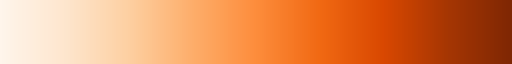

In [ ]:
Oranges_9.mpl_colormap

In [ ]:
colors = apply_continuous_cmap(normalized_heights, Oranges_9)

In [ ]:
layer = PolygonLayer(
    # Select only a few attribute columns from the table
    table=table.select(["id", "height", "geometry", "names"]),
    extruded=True,
    get_elevation=heights,
    get_fill_color=colors,
)

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/lonboard/_geoarrow/ops/reproject.py:23: UserWarning: No CRS exists on data. If no data is shown on the map, double check that your CRS is WGS84.
  warn(


In [ ]:
view_state = {
    "longitude": -73.98416810282863,
    "latitude": 40.72651721370669,
    "zoom": 12.726630492730596,
    "pitch": 59.80465353190481,
    "bearing": 13.243243243243244,
}
m = Map(layer, view_state=view_state)
m

Map(layers=[PolygonLayer(extruded=True, get_elevation=<pyarrow.lib.FloatArray object at 0x169764340>
[
  11.6,…

# save data


In [ ]:
# save out as fgb using geopandas
# pluto_ogrio.to_file("..Data/nyc_mappluto_24v1_1_shp/mappluto.fgb")

In [ ]:
# ogr.write_dataframe(pluto_ogrio, "../Data/nyc_mappluto_24v1_1_shp/mappluto_ogr.fgb")